In [1]:
import os
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from scipy.stats import norm
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

In [2]:
import sklearn

In [3]:
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (15, 5)  

## Download and preparation of the dataframes 

In [4]:
import os
os.chdir(r'C:\Users\pfft\OneDrive\Рабочий стол\БИ\R stat\PCA.Project\superconduct') 

In [5]:
train = pd.read_csv("train.csv")

In [6]:
train[:10]

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [7]:
train = pd.read_csv("train.csv")

In [8]:
unique = pd.read_csv("unique_m.csv")

In [9]:
unique[:10]

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4
5,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.5La1.5Cu1O4
6,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,11.0,Ba1La1Cu1O4
7,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,33.0,Sr0.1La1.9Cu1O4
8,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,36.0,Sr0.15La1.85Cu1O4
9,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,31.0,Sr0.2La1.8Cu1O4


### Check any feachure

<AxesSubplot:>

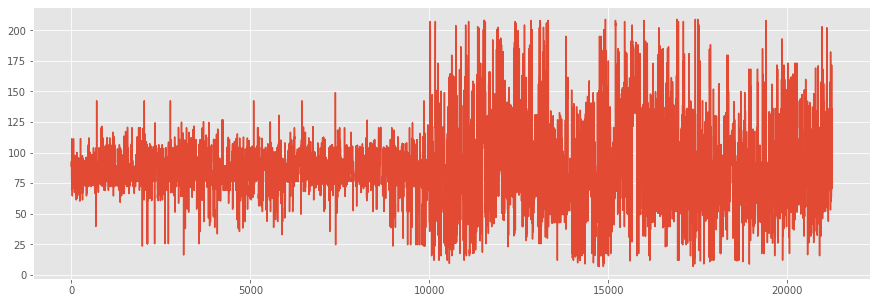

In [10]:
train['mean_atomic_mass'].plot()

Already by this value, it can be said that the data are heterogeneous (spread in the average atomic mass). An important point is that from a certain place the scatter of the data increases many times over. This must be taken into account when dividing the sample into training data and test data.

### Merge both dataframes

In [121]:
s = pd.concat([unique, train], axis=1)
s.shape

(21263, 170)

We have two "critical_temp" colums in our date, so we remove one

In [122]:
sup_cond = s.loc[:,~s.columns.duplicated()]
sup_cond.shape

(21263, 169)

In [95]:
sup_cond.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,1.044611,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.333333,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,2.833333,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,4.000000,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,7.000000,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000


We should delete "material" colum from our date because of useless

In [96]:
sup_cond.drop('material', axis=1, inplace=True)

In [97]:
sup_cond[:10]

,H,He,Li,Be,B,C,N,O,F,Ne,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
5,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326
6,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927
7,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
8,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
9,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059


In [99]:
test, training = sklearn.model_selection.train_test_split(sup_cond, test_size=0.2)
training.shape, test.shape

((4253, 168), (17010, 168))

#### We devide our common date on two groups: test (80%) and training (20%).
Let's describe our date

In [100]:
test.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,17010.000000,17010.0,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,0.019009,0.0,0.011902,0.035917,0.145374,0.387272,0.012583,2.992641,0.015756,0.0,...,3.195608,3.154422,3.053121,3.055955,1.295351,1.052092,2.043269,1.486072,0.840340,0.676997
std,0.288490,0.0,0.130378,0.843488,1.114470,4.367045,0.123483,3.817936,0.135722,0.0,...,1.042331,1.189190,1.043328,1.172029,0.392284,0.379850,1.245373,0.976465,0.485803,0.458331
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.333333,2.116647,2.245649,2.090969,1.060857,0.772802,1.000000,0.923077,0.451754,0.308220
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,2.833333,2.633649,2.615321,2.438027,1.368922,1.162226,2.000000,1.064000,0.800000,0.500000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.790000,0.000000,0.0,...,4.000000,4.035823,3.722419,3.924831,1.589027,1.329736,3.000000,1.920000,1.200000,1.021541
max,14.000000,0.0,3.000000,35.000000,105.000000,70.000000,5.000000,66.000000,4.000000,0.0,...,7.000000,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,2.828427


In [101]:
training.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,4253.000000,4253.0,4253.000000,4253.00000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.0,...,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000
mean,0.012388,0.0,0.013016,0.02952,0.131478,0.375753,0.016090,3.075074,0.011349,0.0,...,3.208708,3.147947,3.070193,3.055606,1.297010,1.055839,2.031977,1.470751,0.835354,0.661947
std,0.155259,0.0,0.126201,0.86854,0.697602,4.568802,0.228355,3.786126,0.116550,0.0,...,1.053741,1.199572,1.057903,1.186030,0.396665,0.382077,1.230268,0.985011,0.480179,0.444260
min,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.333333,2.118390,2.289428,2.091517,1.060857,0.783637,1.000000,0.909091,0.471405,0.304697
50%,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,2.833333,2.575455,2.615321,2.411845,1.368922,1.181150,2.000000,1.058824,0.800000,0.499375
75%,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,6.850000,0.000000,0.0,...,4.000000,4.000000,3.779763,3.886567,1.589027,1.333074,3.000000,1.886400,1.200000,1.014248
max,2.600000,0.0,2.000000,40.00000,12.000000,120.000000,12.800000,41.840000,4.000000,0.0,...,7.000000,7.000000,7.000000,7.000000,2.141963,1.924987,6.000000,6.990900,3.000000,3.000000


### Let's check the distribution of our date

c:\users\pfft\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='critical_temp', ylabel='Density'>

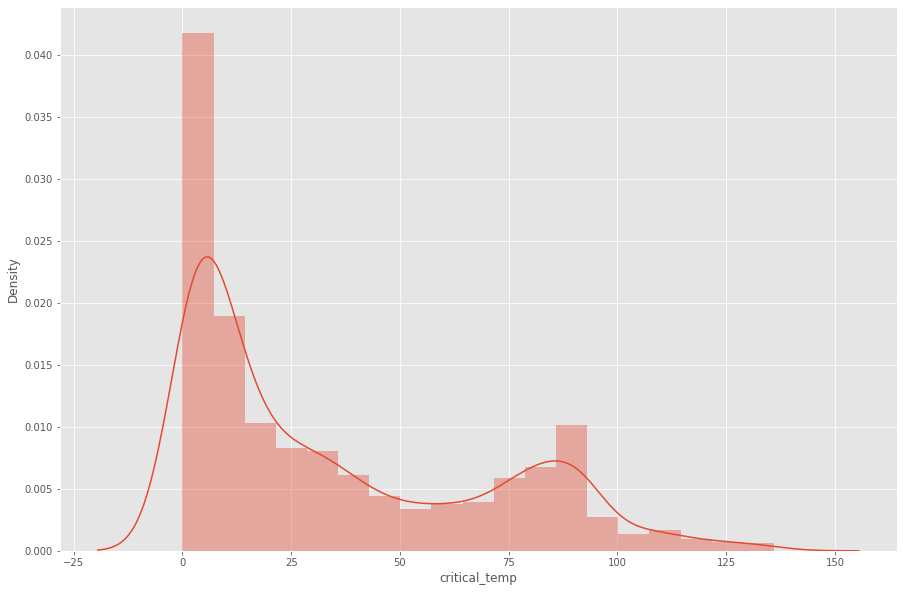

In [102]:
plt.figure(figsize=(15,10))
sns.distplot(training['critical_temp'])

##### Our value has a normal distribution and it's not a good idea to estimate its average.

### Make standartisation 

We make standartisation on training date and transform both train and test datasets

In [103]:
scaler = StandardScaler()# Fit on training set only.
scaler.fit(training[training.columns.difference(['critical_temp'])])# Apply transform to both the training set and the test set.
train_img = scaler.transform(training[training.columns.difference(['critical_temp'])])
test_img = scaler.transform(test[test.columns.difference(['critical_temp'])])

## Linear regression

##### Regression without standartisation

In [20]:
# display adjusted R-squared
# 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [123]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(training[training.columns.difference(['critical_temp'])], training['critical_temp'])
print("Adjusted R-squared: ", 1 - (1-regressor.score(training[training.columns.difference(['critical_temp'])], training['critical_temp']))*(len(training['critical_temp'])-1)/(len(training['critical_temp'])-training[training.columns.difference(['critical_temp'])].shape[1]-1))
# display coefficients
#print(regressor.coef_)

Adjusted R-squared:  0.7715962290786752


##### Regression with standartisation

In [141]:
regressor2 = LinearRegression()
regressor2.fit(train_img, training['critical_temp'])
print("Adjusted R-squared: ", 1 - (1-regressor2.score(train_img, training['critical_temp']))*(len(training['critical_temp'])-1)/(len(training['critical_temp'])-train_img.shape[1]-1))

Adjusted R-squared:  0.7713538256934926


#### We can see the same results (~). Let's predict results with our the model (we use scale-model).

In [142]:
test_actual = np.array(test['critical_temp']) # Make array 
test_pred = regressor2.predict(test_img)
df = pd.DataFrame({'Actual': test_actual.flatten(), 'Predicted': test_pred.flatten()})
df

,Actual,Predicted
0,4.43,-3.103097
1,91.00,68.865396
2,4.60,2.376107
3,11.60,19.074763
4,92.90,73.781034
...,...,...
17005,24.00,67.899094
17006,64.50,69.995230
17007,29.00,21.565344
17008,4.97,7.733978


#### Visual control

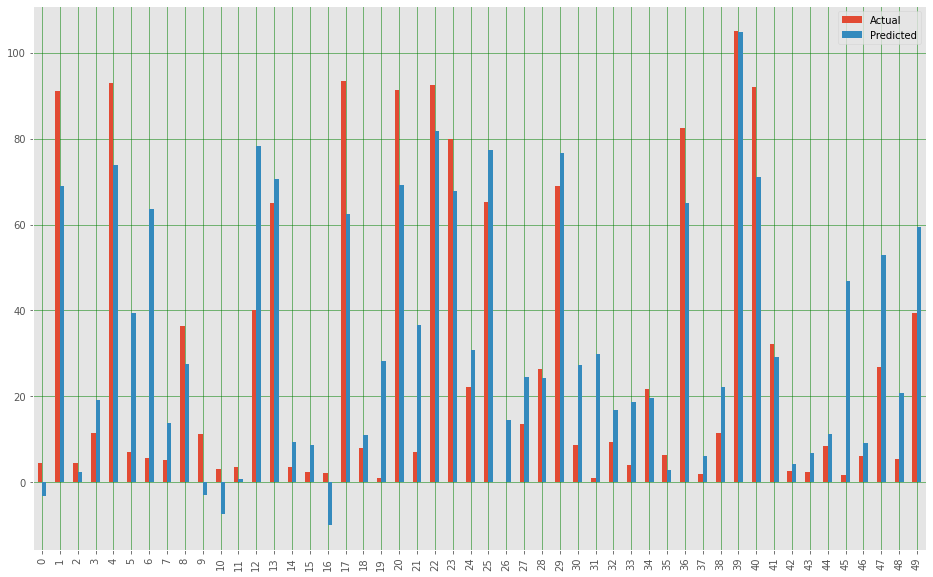

In [143]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Calculate some metrics:


In [144]:
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test_actual, test_pred))  
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test_actual, test_pred))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test_actual, test_pred)))

Mean Absolute Error: 12.963868600320307
Mean Squared Error: 734.0042958346824
Root Mean Squared Error: 27.092513649247874


In [145]:
R = 1-(sklearn.metrics.mean_squared_error(test_actual, test_pred)/(sum((test_actual - np.mean(test_actual))**2)/len(test_actual)))
Ra = 1-(((1-R)*(len(test_actual)-1))/(len(test_actual)-167))
print("R-squared:", R)
print("Adjusted R-squared:", Ra)

R-squared: 0.37221047536393626
Adjusted R-squared: 0.3660231535632128


### This model has bed metrics for test prediction

## PCA
Let's try to improve the quality of the model using the principal component analysis.

In [146]:
pca = PCA(.80) # We want to take so many components to explain 80% of the variability

In [147]:
pca.fit(train_img) # Get the matrix on the training data
test_pca = pca.transform(test_img) # Transforming test data

In [148]:
train_pca = pca.transform(train_img) # Let's transform the training data
print("Number of components: ", train_pca.shape[1])
regressor3 = LinearRegression()
regressor3.fit(train_pca, training['critical_temp']) # Train the new model on the transformed data
print("Adjusted R-squared: ", 1 - (1-regressor3.score(train_pca, training['critical_temp']))*(len(training['critical_temp'])-1)/(len(training['critical_temp'])-train_pca.shape[1]-1))

Number of components:  47
Adjusted R-squared:  0.6578898645129752


#### 52 components account for 80% of the variability in the data. Adjusted R-squared of the new model is lower than the previous one.
Now let's try to take so many components to explain 95% of the variability.

In [149]:
pca = PCA(.95) # We want to take so many components to explain 95% of the variability
pca.fit(train_img) # Get the matrix on the training data
test_pca = pca.transform(test_img) # Transforming test data
train_pca = pca.transform(train_img) # Let's transform the training data
print("Number of components: ", train_pca.shape[1])
regressor3 = LinearRegression()
regressor3.fit(train_pca, training['critical_temp']) # Train the new model on the transformed data
print("Adjusted R-squared: ", 1 - (1-regressor3.score(train_pca, training['critical_temp']))*(len(training['critical_temp'])-1)/(len(training['critical_temp'])-train_pca.shape[1]-1))

Number of components:  77
Adjusted R-squared:  0.6759911737776092


In [150]:
test_pred = regressor3.predict(test_pca)
df = pd.DataFrame({'Actual': test_actual.flatten(), 'Predicted': test_pred.flatten()})
df

,Actual,Predicted
0,4.43,-1.672539
1,91.00,63.954203
2,4.60,9.158386
3,11.60,27.652939
4,92.90,64.031333
...,...,...
17005,24.00,70.477519
17006,64.50,64.893186
17007,29.00,19.205365
17008,4.97,12.678651


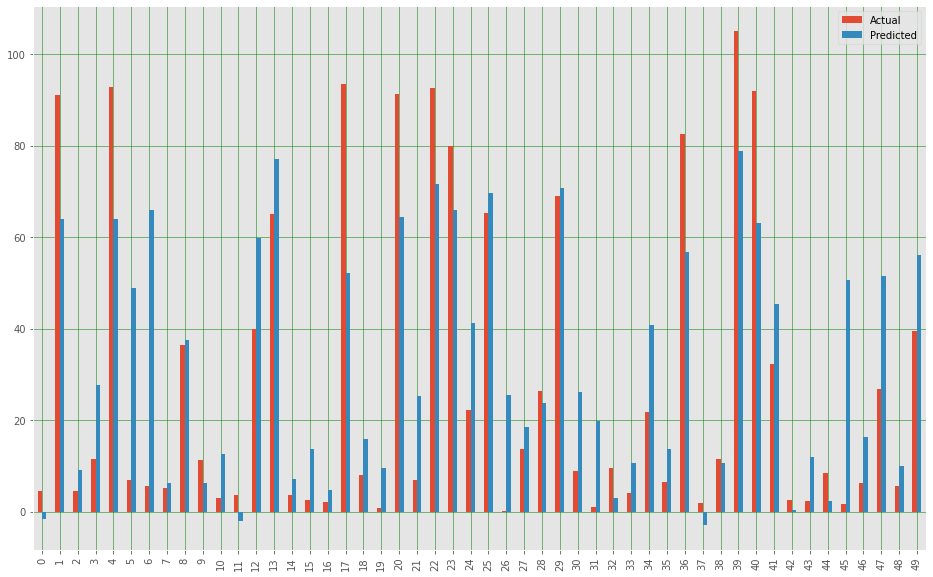

In [151]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [152]:
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test_actual, test_pred))  
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test_actual, test_pred))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test_actual, test_pred)))
R = 1-(sklearn.metrics.mean_squared_error(test_actual, test_pred)/(sum((test_actual - np.mean(test_actual))**2)/len(test_actual)))
Ra = 1-(((1-R)*(len(test_actual)-1))/(len(test_actual)-167))
print("R-squared:", R)
print("Adjusted R-squared:", Ra)

Mean Absolute Error: 14.868601347335808
Mean Squared Error: 848.397681493384
Root Mean Squared Error: 29.12726697603783
R-squared: 0.2743704904868438
Adjusted R-squared: 0.26721888456276954


#### Thus, adding components does not improve the quality of the model too much.

#### Both models have poor predictive power on test data, but the initial model with all predictors performed better. In this case, PCA dimension reduction did not improve the quality of the model.

## Kernal PCA

##### This method is very resource intensive. I will describe its code in this section, but it will not be implemented in the notebook. Its results are presented below.
kpca = KernelPCA(kernel="rbf", 
                 fit_inverse_transform=True,
                 gamma=10,
                n_components=2)
                
X_transform = kpca.fit_transform(training[training.columns.difference(['critical_temp'])])

In [34]:
os.chdir(r'C:\Users\pfft\OneDrive\Рабочий стол\БИ\R stat\PCA.Project') 
X_transform = np.load("X_transform_kPCA.npy")

In [153]:
X_transform.shape

(21263, 15782)

In [154]:
regressor4 = LinearRegression()
regressor4.fit(X_transform, sup_cond['critical_temp']) # Train the new model on the transformed data

LinearRegression()

In [156]:
print("Adjusted R-squared: ", 1 - (1-regressor4.score(X_transform, sup_cond['critical_temp']))*(len(sup_cond['critical_temp'])-1)/(len(sup_cond['critical_temp'])-X_transform.shape[1]-1))

Adjusted R-squared:  0.9431417075764638


#### The quality of the model has improved significantly!

### CONCLUSIONS

#### Thus, we built three models that predict the critical temperature value from the characteristics of the material. The best result was shown by the model obtained using the kernalPCA data transformation. Next in quality is the simple regression model with all predictors. The last place is taken by the model obtained by dimension reduction using the usual PCA. We can conclude that in this dataset, increasing the dimension allows us to make a better model. This is most likely due to complex interactions between the studied characters. Indeed, the properties of a substance can vary significantly depending on its structure and types of chemical bonds in the substance.